In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
df = pd.read_csv('D:/general volume D/sample datasets/bank_churn_dataset/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [45]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [46]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [47]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [48]:
df = df.drop(['RowNumber', 'Surname'], axis=1)
#this line will not execute again as both the columns have been dropped
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
df = pd.get_dummies(df, drop_first= True)
df.head()
#additional columns have been added for male females and countries 
df = df.astype(int)
df

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0,1,1,1,101348,1,0,0,0
1,15647311,608,41,1,83807,1,0,1,112542,0,0,1,0
2,15619304,502,42,8,159660,3,1,0,113931,1,0,0,0
3,15701354,699,39,1,0,2,0,0,93826,0,0,0,0
4,15737888,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0,2,1,0,96270,0,0,0,1
9996,15569892,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,15584532,709,36,7,0,1,0,1,42085,1,0,0,0
9998,15682355,772,42,3,75075,2,1,0,92888,1,1,0,1


In [50]:
#no of female and male costumers
df['Gender_Male'].value_counts()
#1 indicate male & 0 indicate female

Gender_Male
1    5457
0    4543
Name: count, dtype: int64

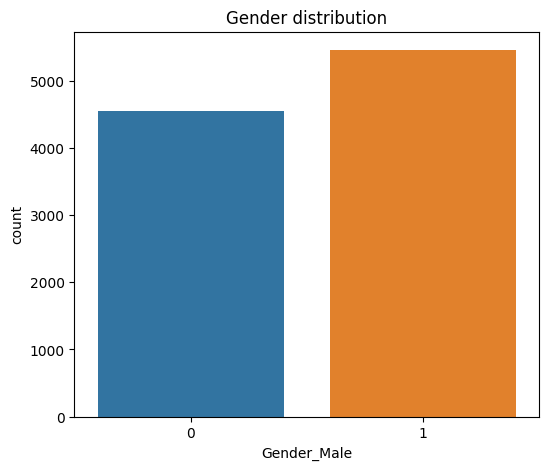

In [51]:
plt.figure(figsize=(6,5))
plt.title("Gender distribution")
sns.countplot(data = df, x = 'Gender_Male');

### Standardizing and splitting our data into training n testing 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [53]:
X = df.drop('Exited', axis= 1)
y = df['Exited']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)
print(f"The shape of datasets are {X_train.shape} for training data and {X_test.shape} for testing data ")

The shape of datasets are (8000, 12) for training data and (2000, 12) for testing data 


In [55]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit(X_test)

print("Scaled data\n")
print(X_train_scaled)


Scaled data

[[-0.80631356  0.35476836 -0.18423398 ...  1.72286214 -0.57484841
   0.9111777 ]
 [ 0.07968684  0.30282874 -0.2796117  ... -0.58042949 -0.57484841
  -1.09748077]
 [-0.32636075  0.02235481 -0.08885627 ... -0.58042949  1.73958906
  -1.09748077]
 ...
 [ 1.14962974  0.23011328  0.38803232 ... -0.58042949 -0.57484841
  -1.09748077]
 [-0.15201452 -0.60092059 -0.75650029 ... -0.58042949 -0.57484841
  -1.09748077]
 [ 1.5250527  -1.79553176 -1.42414431 ...  1.72286214 -0.57484841
  -1.09748077]]


### Now using different algorithms and comparing their accuracies.

Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [59]:
#threshold = 0.5
#y_train_classified = [1 if value > threshold else 0 for value in y_train]

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [60]:
#y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy1 = logreg.score(X_test, y_test)
print(f"Logistic Regression accuracy is {accuracy1:.2f}%")

Logistic Regression accuracy is 0.79%
